In [1]:
import pandas as pd
cars = pd.read_csv(r"C:\DATASCIENCE\PROJECTS\ML DATA\cars.csv")
pd.set_option('display.max_columns', None)
cars

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000
96,97,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000
97,98,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,99,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000


In [2]:
import pandas as pd
from tabulate import tabulate

# Assuming 'cars' is your DataFrame containing the car dataset

# Displaying first few rows of the dataset
print("First few rows of the dataset:")
print(tabulate(cars.head(), headers='keys', tablefmt='psql'))

# Summary statistics
print("\nSummary statistics:")
print(tabulate(cars.describe(), headers='keys', tablefmt='psql'))

# Checking for missing values
print("\nMissing values:")
print(tabulate(pd.DataFrame(cars.isnull().sum(), columns=['Missing Count']), headers='keys', tablefmt='psql'))

# Data types of columns
print("\nData types:")
print(tabulate(pd.DataFrame(cars.dtypes, columns=['Data Type']), headers='keys', tablefmt='psql'))

# Unique values in categorical columns
print("\nUnique values in Fuel_Type:")
print(tabulate(pd.DataFrame(cars['Fuel_Type'].unique(), columns=['Fuel_Type']), headers='keys', tablefmt='psql'))

print("\nUnique values in Transmission:")
print(tabulate(pd.DataFrame(cars['Transmission'].unique(), columns=['Transmission']), headers='keys', tablefmt='psql'))

print("\nUnique values in Owner_Type:")
print(tabulate(pd.DataFrame(cars['Owner_Type'].unique(), columns=['Owner_Type']), headers='keys', tablefmt='psql'))


First few rows of the dataset:
+----+----------+---------+---------+--------+---------------------+-------------+----------------+--------------+-----------+----------+---------+---------+---------+
|    |   Car_ID | Brand   | Model   |   Year |   Kilometers_Driven | Fuel_Type   | Transmission   | Owner_Type   |   Mileage |   Engine |   Power |   Seats |   Price |
|----+----------+---------+---------+--------+---------------------+-------------+----------------+--------------+-----------+----------+---------+---------+---------|
|  0 |        1 | Toyota  | Corolla |   2018 |               50000 | Petrol      | Manual         | First        |        15 |     1498 |     108 |       5 |  800000 |
|  1 |        2 | Honda   | Civic   |   2019 |               40000 | Petrol      | Automatic      | Second       |        17 |     1597 |     140 |       5 | 1000000 |
|  2 |        3 | Ford    | Mustang |   2017 |               20000 | Petrol      | Automatic      | First        |        10 |   

In [3]:
import datetime

# Assuming 'Year' column contains the manufacturing year of the car
current_year = datetime.datetime.now().year
cars['Age_of_Car'] = current_year - cars['Year']

# View the updated dataset with the new feature
print(cars.head())


   Car_ID    Brand    Model  Year  Kilometers_Driven Fuel_Type Transmission  \
0       1   Toyota  Corolla  2018              50000    Petrol       Manual   
1       2    Honda    Civic  2019              40000    Petrol    Automatic   
2       3     Ford  Mustang  2017              20000    Petrol    Automatic   
3       4   Maruti    Swift  2020              30000    Diesel       Manual   
4       5  Hyundai   Sonata  2016              60000    Diesel    Automatic   

  Owner_Type  Mileage  Engine  Power  Seats    Price  Age_of_Car  
0      First       15    1498    108      5   800000           6  
1     Second       17    1597    140      5  1000000           5  
2      First       10    4951    395      4  2500000           7  
3      Third       23    1248     74      5   600000           4  
4     Second       18    1999    194      5   850000           8  


Mileage Prediction using Linear Regression


In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Feature selection and preprocessing
features = ['Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Engine', 'Power', 'Seats']
X = pd.get_dummies(cars[features], drop_first=True)
y = cars['Mileage']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 5.150392048332096


Classification of Car Price Range using Random Forest

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Binning the price into categories
cars['Price_Range'] = pd.cut(cars['Price'], bins=[0, 10000, 20000, 50000, float('inf')], labels=['low', 'medium', 'high', 'very high'])

# Feature selection and preprocessing
X = pd.get_dummies(cars[features], drop_first=True)
y = cars['Price_Range']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

   very high       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



Brand Analysis using Random Forest

In [6]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Preprocessing
X = pd.get_dummies(cars[features], drop_first=True)
y = cars['Brand']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.55


Accuracy: 0.55


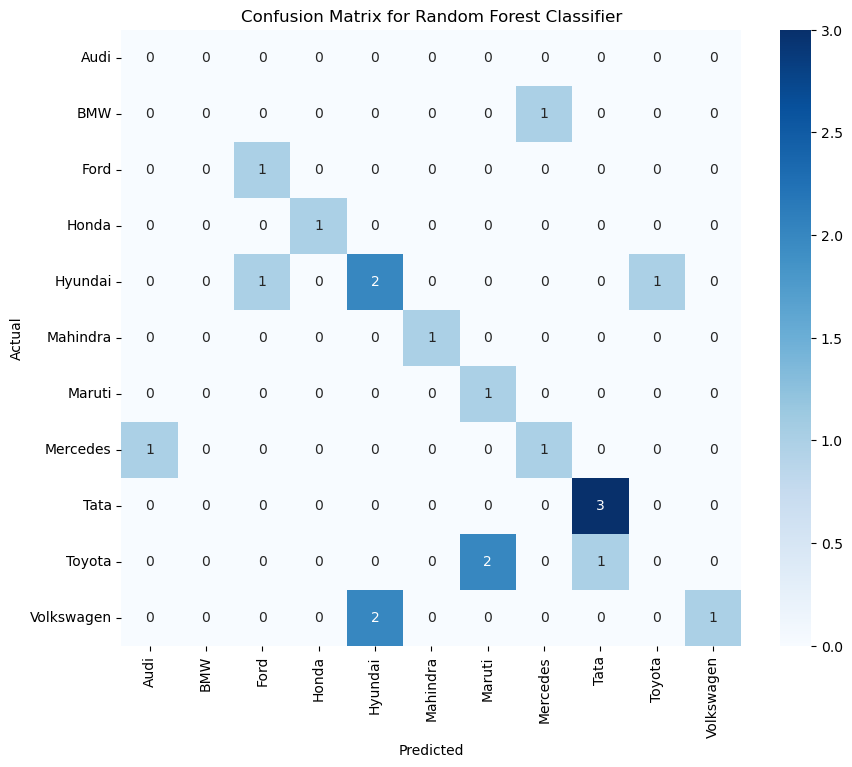

In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Feature selection and preprocessing
features = ['Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Engine', 'Power', 'Seats']
X = pd.get_dummies(cars[features], drop_first=True)
y = cars['Brand']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


Fuel Type Prediction using Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

# Preprocessing
X = pd.get_dummies(cars[features], drop_first=True)
y = cars['Fuel_Type']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 1.0


Owner Type Prediction using Decision Trees

In [9]:
from sklearn.tree import DecisionTreeClassifier

# Preprocessing
X = pd.get_dummies(cars[features], drop_first=True)
y = cars['Owner_Type']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 1.0


Feature Importance Analysis using Random Forest

In [10]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


# Feature selection and preprocessing
features = ['Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Engine', 'Power', 'Seats']
X = pd.get_dummies(cars[features], drop_first=True)
y = cars['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)




               Feature  Importance
3                Power    0.865876
1    Kilometers_Driven    0.058748
2               Engine    0.028000
6  Transmission_Manual    0.027353
0                 Year    0.012513
4                Seats    0.004238
5     Fuel_Type_Petrol    0.001577
7    Owner_Type_Second    0.001364
8     Owner_Type_Third    0.000332


Market Segmentation using K-Means Clustering

c:\Users\amals\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


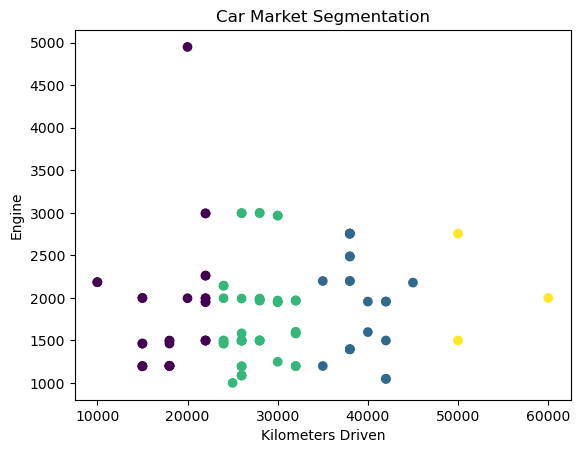

In [11]:
import os
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Set environment variable to avoid memory leak
os.environ["OMP_NUM_THREADS"] = "1"
# Feature selection and preprocessing
features = ['Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Engine', 'Power', 'Seats']
X = pd.get_dummies(cars[features], drop_first=True)
# Train the K-Means model with explicit n_init parameter
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X)
# Assign clusters
cars['Cluster'] = kmeans.labels_
# Plot the clusters using 'Kilometers_Driven' and 'Engine'
plt.scatter(X['Kilometers_Driven'], X['Engine'], c=cars['Cluster'])
plt.xlabel('Kilometers Driven')
plt.ylabel('Engine')
plt.title('Car Market Segmentation')
plt.show()